# Setup

In [3]:
%pip install matplotlib opencv-python

Note: you may need to restart the kernel to use updated packages.


# Reduce Number of intensity Levels


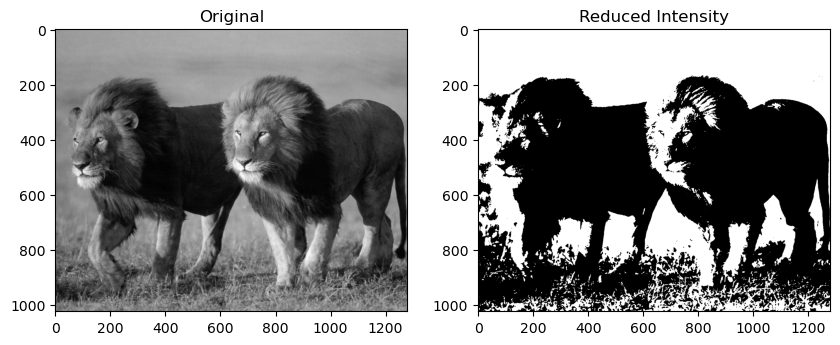

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


def reduce_intensity_levels(image_path, levels):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    factor = 256 // levels
    reduced_img = (img // factor) * factor
    return img, reduced_img

img_path ="image.jpg"
original, reduced = reduce_intensity_levels(img_path, 2)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.title("Original")
plt.imshow(original, cmap="gray")

plt.subplot(1, 2, 2)
plt.title("Reduced Intensity")
plt.imshow(reduced, cmap="gray")
plt.show()


# 3×3, 10×10, and 20×20 Averaging

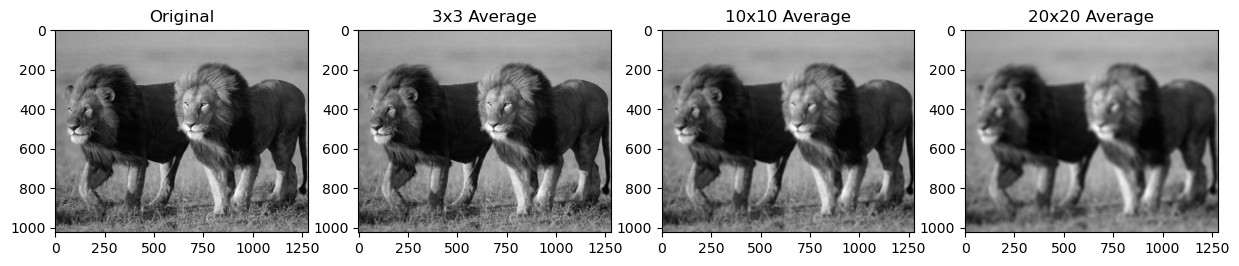

In [15]:
def average_filtering(image_path, kernel_sizes=[3, 10, 20]):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    outputs = []
    for k in kernel_sizes:
        blurred = cv2.blur(img, (k, k))
        outputs.append((k, blurred))
    return img, outputs


original, filtered_outputs = average_filtering(img_path)

plt.figure(figsize=(15, 4))
plt.subplot(1, 4, 1)
plt.title("Original")
plt.imshow(original, cmap="gray")

for i, (k, img_k) in enumerate(filtered_outputs):
    plt.subplot(1, 4, i + 2)
    plt.title(f"{k}x{k} Average")
    plt.imshow(img_k, cmap="gray")

plt.show()


# Rotate Image by 45° and 90°

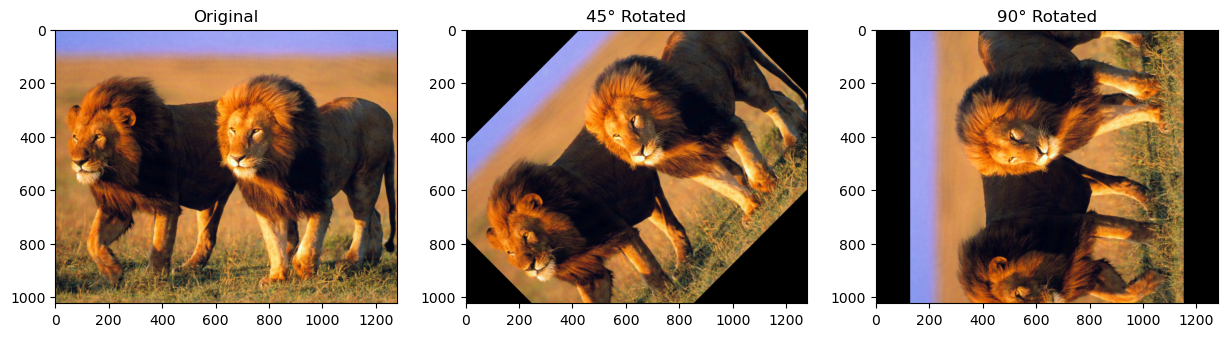

In [16]:
def rotate_image(image_path, angle):
    img = cv2.imread(image_path)
    (h, w) = img.shape[:2]
    center = (w // 2, h // 2)
    matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(img, matrix, (w, h))
    return img, rotated


_, rotated_45 = rotate_image(img_path, 45)
_, rotated_90 = rotate_image(img_path, 90)

plt.figure(figsize=(15, 4))
plt.subplot(1, 3, 1)
plt.title("Original")
plt.imshow(cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB))

plt.subplot(1, 3, 2)
plt.title("45° Rotated")
plt.imshow(cv2.cvtColor(rotated_45, cv2.COLOR_BGR2RGB))

plt.subplot(1, 3, 3)
plt.title("90° Rotated")
plt.imshow(cv2.cvtColor(rotated_90, cv2.COLOR_BGR2RGB))
plt.show()


# Block Averaging

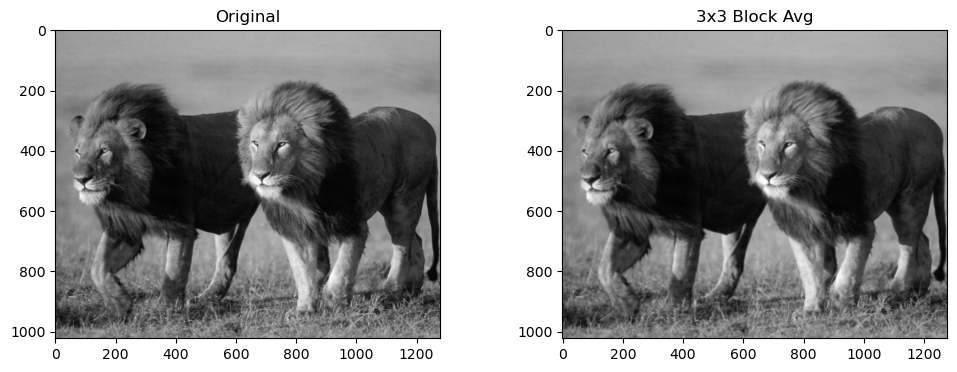

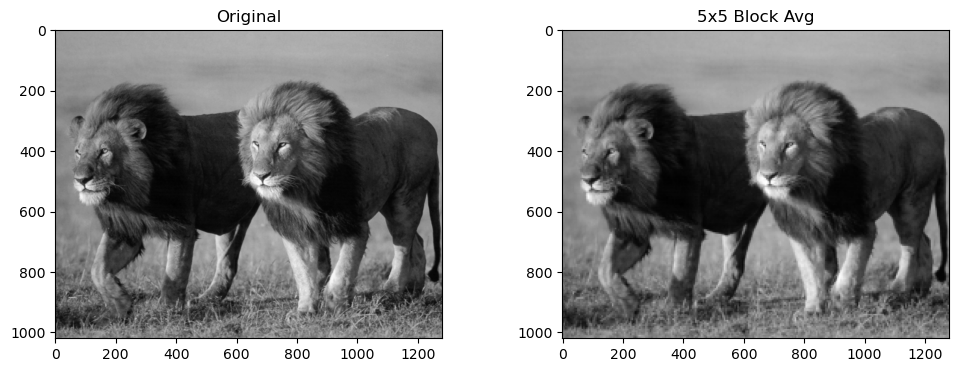

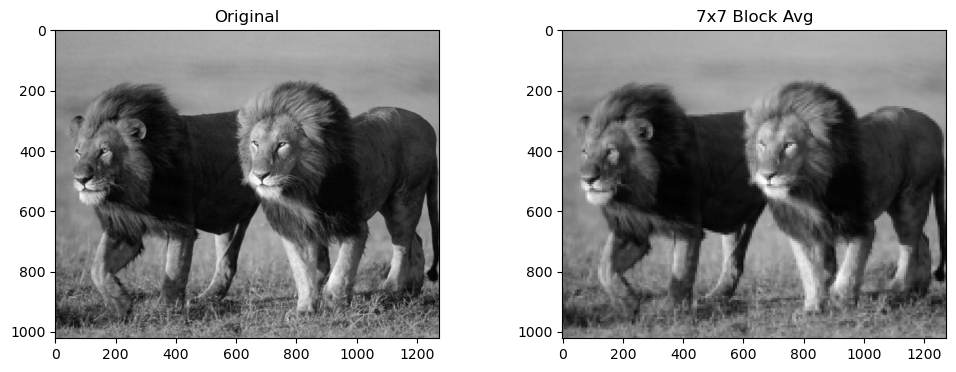

In [21]:
def block_average(image_path, block_size):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    h, w = img.shape
    img = img[: h - h % block_size, : w - w % block_size]
    small = img.reshape(h // block_size, block_size, w // block_size, block_size).mean(
        axis=(1, 3)
    )
    result = np.kron(small, np.ones((block_size, block_size))).astype(np.uint8)
    return img, result


for b in [3, 5, 7]:
    original, result = block_average(img_path, b)
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.title("Original")
    plt.imshow(original, cmap="gray")
    plt.subplot(1, 2, 2)
    plt.title(f"{b}x{b} Block Avg")
    plt.imshow(result, cmap="gray")
    plt.show()
